<a href="https://colab.research.google.com/github/maing-rv/python_cw/blob/main/python_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Loading the data

Collab code environment:
Mai was here.

Problem statement and hypothesis: Predicting popularity vs. Genre classification.


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [37]:
spotify_data_by_year = pd.read_csv('data_by_year.csv')
spotify_data_by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1920,0.631242,0.515750,238092.997135,0.418700,0.354219,0.216049,-12.654020,0.082984,113.226900,0.498210,0.610315,2,1
1,1921,0.862105,0.432171,257891.762821,0.241136,0.337158,0.205219,-16.811660,0.078952,102.425397,0.378276,0.391026,2,1
2,1922,0.828934,0.575620,140135.140496,0.226173,0.254776,0.256662,-20.840083,0.464368,100.033149,0.571190,0.090909,5,1
3,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.205405,0,1
4,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10,1


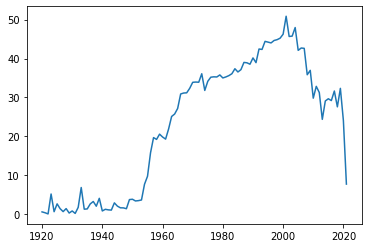

In [51]:
plt.plot(spotify_data_by_year.year, spotify_data_by_year.popularity)
plt.show()

In [33]:
spotify_data = pd.read_csv('data.csv')
print(spotify_data.head())
print(spotify_data.describe())
#spotify_data.shape #19 columns

   acousticness                    artists  ...  valence  year
0      0.991000            ['Mamie Smith']  ...   0.6340  1920
1      0.643000  ["Screamin' Jay Hawkins"]  ...   0.9500  1920
2      0.993000            ['Mamie Smith']  ...   0.6890  1920
3      0.000173        ['Oscar Velazquez']  ...   0.0422  1920
4      0.295000                   ['Mixe']  ...   0.2990  1920

[5 rows x 19 columns]
        acousticness   danceability  ...        valence           year
count  174389.000000  174389.000000  ...  174389.000000  174389.000000
mean        0.499228       0.536758  ...       0.524533    1977.061764
std         0.379936       0.176025  ...       0.264477      26.907950
min         0.000000       0.000000  ...       0.000000    1920.000000
25%         0.087700       0.414000  ...       0.311000    1955.000000
50%         0.517000       0.548000  ...       0.536000    1977.000000
75%         0.895000       0.669000  ...       0.743000    1999.000000
max         0.996000       0.98

In [40]:
spotify_data_w_genres = pd.read_csv('data_w_genres.csv')
#spotify_data_w_genres.head()

### Preproccessing Dataset


In [41]:
spotify_data.isnull().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
dtype: int64

In [ ]:
spotify_data_w_genres.isnull().sum()

In [47]:
corr = spotify_data.corr()
corr

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.263217,-0.089169,-0.750852,-0.208176,0.221956,-0.028028,-0.029654,-0.546639,0.064633,-0.396744,-0.022437,-0.223840,-0.166968,-0.607515
danceability,-0.263217,1.000000,-0.100757,0.204838,0.200842,-0.215589,0.026266,-0.110033,0.249541,-0.048358,0.123746,0.239962,0.005479,0.536713,0.159095
duration_ms,-0.089169,-0.100757,1.000000,0.060516,-0.033808,0.103621,0.002020,0.028942,0.019791,-0.046849,0.024717,-0.097838,-0.008182,-0.183199,0.105661
energy,-0.750852,0.204838,0.060516,1.000000,0.102561,-0.177750,0.035780,0.134815,0.779267,-0.056160,0.328939,-0.112616,0.266448,0.326418,0.540850
explicit,-0.208176,0.200842,-0.033808,0.102561,1.000000,-0.130609,0.005282,0.037288,0.106249,-0.062503,0.152545,0.353872,0.008075,-0.009275,0.151619
instrumentalness,0.221956,-0.215589,0.103621,-0.177750,-0.130609,1.000000,-0.004619,-0.047941,-0.317562,-0.056731,-0.300625,-0.133966,-0.068656,-0.219188,-0.114259
key,-0.028028,0.026266,0.002020,0.035780,0.005282,-0.004619,1.000000,-0.003368,0.025227,-0.127397,0.001951,0.009648,0.005009,0.025592,0.019194
liveness,-0.029654,-0.110033,0.028942,0.134815,0.037288,-0.047941,-0.003368,1.000000,0.062695,0.001677,-0.078959,0.122034,0.008586,-0.005781,-0.011852
loudness,-0.546639,0.249541,0.019791,0.779267,0.106249,-0.317562,0.025227,0.062695,1.000000,-0.019250,0.337194,-0.213504,0.217914,0.302520,0.465189
mode,0.064633,-0.048358,-0.046849,-0.056160,-0.062503,-0.056731,-0.127397,0.001677,-0.019250,1.000000,0.007652,-0.040711,0.002438,0.021592,-0.048922


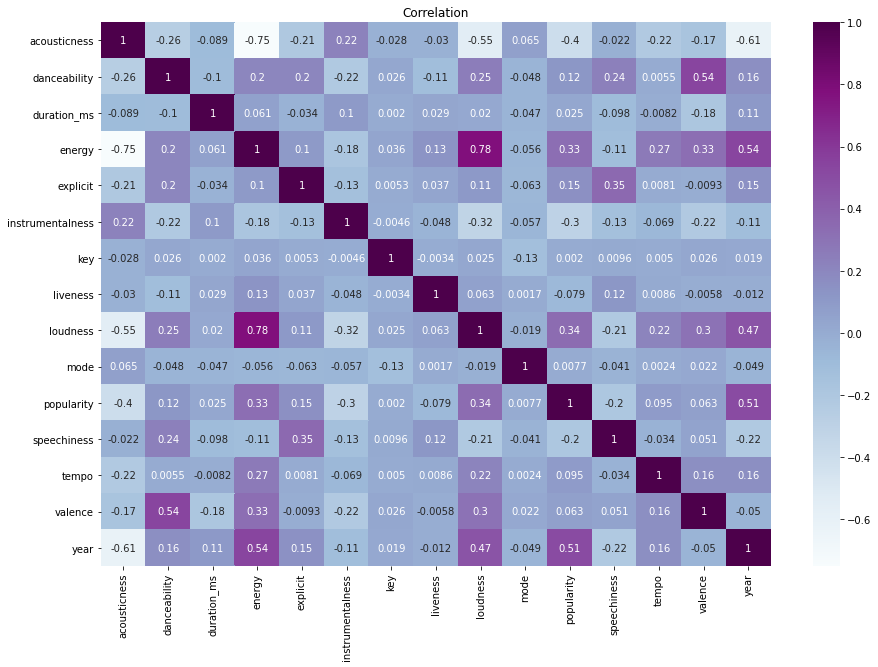

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap='BuPu') #BrBG_r
plt.title('Correlation')
plt.show()

Question: What year range to use? 